## Introduction and Business requirement

### A. Backgound of the problem:

#### Opening a new branch of the Bank in Almaty city, Kazakhstan

The majority of international cities like Toronto, New York or other cities have districts called "neighborhoods", these are actually geographical locations of different size areas. In the city where I live division of the city geographically done by seven administritive districts. Each of these districts have its own Governor, hospitals, Universities and almost similiar infustructure with typical houses of former USSR country, Kazakhstan. 

Almaty is a previous capital of Kazakhstan with population around two millions of people, located under mountains with lots of facilities and financial organizations. Currently, Almaty is considered to be the financial capital of Kazakstan and the biggest financial hub of Central Asia. As on March 2020, there are 17 local second-tier Bank's officially registered in Kazakhstan and 10 international Banks of different nature: russian banks, chinese banks, korean banks and one american. The Central Bank is also located in Almaty.

A great number of Banks, especially local with a very developed infrastructure (ATM, Branches) create very serious competition to other International Banks. As an example the biggest by assets local Bank " Halyk Bank" has more than 70 branches in Almaty. Total number of Branches, Banks in the city is more than 200, which is a really a lot for the medium size city.

The main business requiement of this project is to identify the best district for opening of new Bank's Branch within same city as Head Office, Almaty. Main requirement of the business is to identify places with high potentials, good developed infrastructure and preferably in the center of city. 

<b>The definite location is critically important for the Bank as:<b> 

1. Branch will be separate business unit with decentralized Management powers
2. Bank has no ATM's
3. New Branch will be providing financial services to SME and individuals
4. Retail Business is a priority 
5. Parking availability for clients
6. Better location provides competetive advantage for Retail business 
    
Why it is important? 

##### We live in the world where financial services bring same importance to our lives as food, internet, transportation. Financial institutions have to be very competetive to ensure best services to the customers in terms of location of their offices, quality of products.

### <b>B.Data description<b>

I will try to solve all these problems in this research by using different sources of information (data). As the main part of these research is location data i will use FOURSQARE Api's to extract the coordinates of organizations, cafes, and etc. However, the parsing sources of Google maps is too required as Foursqare is not very popular web in Almaty and to solve real problem some relevant resourses such as OutScraper also will be used. In order to define the population of each district of the city, it's density and other data i will use wikipedia tables as its a really good a renewable sourse of information about city and it administrative districts. 

<b>Target audience <b>:

1. Business personnel, Top Management of the Bank, Shareholder and other Departments. This research will be a guide how to define a better location of organization and see competitors locations to avoid leakage of income.
2. Anyone who is interested in accumulating information about exploratory Data Analysis of their cities.

### <b>C.Methodology<b>

Intruments for this research are open sources which are available for everyone. I used Jupiter Notebook and Github repository for this research. My master data which has the main components district (address_borough), Latitude and Longitude off all of the Banks and their Branches in the city. It is pertinent to mention that I have used two main sources Foursqare to define Head Offices of the Bank, and Google Maps to find all the Branches. 

In [122]:
df.head(10)

,name,type,address_borough,lat,lng
0,Citibank Kazakhstan,Bank,Medeu District,43.257438,76.956957
1,Tengri Bank,Bank,Bostandyk District,43.240714,76.927797
2,KZI BANK (Kazakhstan Ziraat International Bank),Bank,Bostandyk District,43.235870,76.902687
3,Center Credit Bank,Bank,Medeu District,43.261060,76.960007
4,Center Credit Bank,Bank,Medeu District,43.226612,76.942683
5,National Bank of Pakistan,Bank,Medeu District,43.225966,76.961241
6,Capital Bank,Bank,Bostandyk District,43.240537,76.947502
7,MUFG Bank Almaty Representative Office,Bank,Medeu District,43.227407,76.944123
8,National Bank of Kazakhstan,Central bank,Bostandyk District,43.235131,76.917940
9,Eurasian Development Bank HQ,Bank,Medeu District,43.228007,76.961421


During the research I was using folium library to vizualize all geographical areas of where Banks are located and labelled them. 

In [123]:
alm_venues_map

After vizualization we can come to conclusion that city has a great number of financial servises located in every part, therefore I used count() method to see what are the numbers of Banks located in each district and parsed wikitable with administrative information like population. All this data was merged to define population/banks offices ratio to understand what is real picture in each area.

In [124]:
df_merged.head()

,address_borough,populations,n_of_banks,pop_to_bank_ratio
1,Almaly District,215768.0,64.0,3371
5,Medeu District,209836.0,47.0,4464
3,Bostandyk District,343541.0,56.0,6134
2,Auezov District,295543.0,32.0,9235
7,Turksib District,235357.0,3.0,78452


<b>Now we can see the different districts of Almaty and the number of Banks in each district, but having only quantative data we cannot do any research conclusion<b>  

Lets see how  the data is displayed and what additional information it can bring to us! 

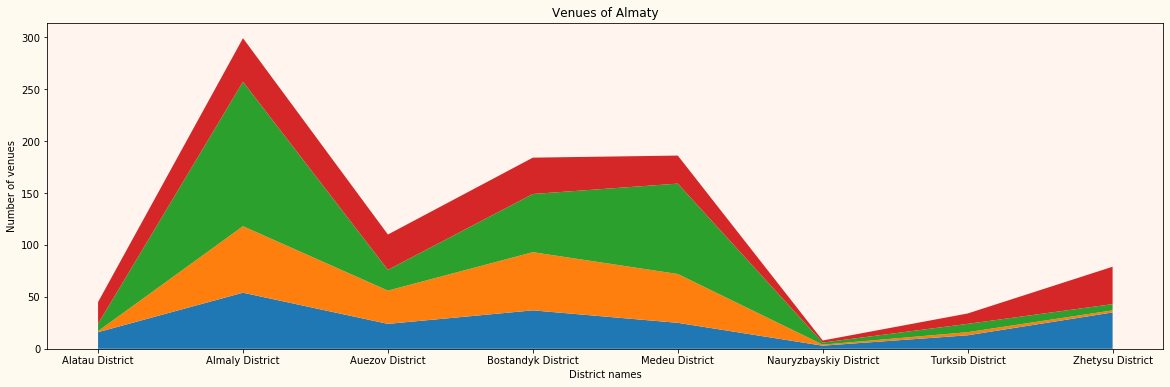

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = fgrs_for_plot['address_borough']

y1 = fgrs_for_plot['n_companies']
y2= fgrs_for_plot['n_of_banks']
y3 = fgrs_for_plot['n_of_pastimes']
y4 =  fgrs_for_plot['n_of_molls']

fig, ax = plt.subplots()

ax.stackplot(x, [y1, y2, y3, y4])

ax.set_facecolor('seashell')

fig.set_figwidth(20)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')

plt.title('Venues of Almaty')
plt.ylabel('Number of venues')
plt.xlabel('District names')

plt.show()

Due to the fact that Almaty city has 848 venues its if complicated to vizualize all them and I decided to choose top 10 venues and accumulated them in the table below. Most of them are the Banks, cafes, wholesale trade and different shops. 

In [126]:
neighborhoods_venues_sorted.head(10)

,Cluster_Labels,address_borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Alatau District,Торговый центр,Кафе,Офис компании,Магазин,Оптовая торговля,Магазин спецодежды,Магазин автозапчастей,Подрядчик по бурению скважин,Поставщик промышленного оборудования,Ресторан
1,3,Almaly District,Кафе,Bank,Торговый центр,Ресторан,Кофейня,Офис компании,Ресторан грузинской кухни,ATM,Производитель,Ресторан итальянской кухни
2,1,Auezov District,Торговый центр,Bank,Кафе,Офис компании,Ресторан,Производитель,Магазин напольных покрытий,Поставщик металлопроката,Поставщик промышленного оборудования,Лапшичная
3,3,Bostandyk District,Bank,Торговый центр,Кафе,Ресторан,ATM,Офис компании,Кофейня,Ресторан узбекской кухни,Семейный ресторан,Оптовая торговля
4,3,Medeu District,Bank,Кафе,Торговый центр,Ресторан,Эспрессо-бар,Кофейня,ATM,Ресторан вьетнамской кухни,Строительная компания,Ресторан итальянской кухни
5,0,Nauryzbayskiy Disctrict,Bank,Ювелирный магазин,Ломбард,Магазин кофе,Магазин косметики и парфюмерии,Магазин канцелярских товаров,Магазин инструмента,Магазин бытовой техники,Магазин антикварной мебели,Магазин автозапчастей
6,2,Nauryzbayskiy District,Производитель,Торговый центр,Фармацевтическая компания,Ювелирный магазин,Лапшичная,Магазин канцелярских товаров,Магазин инструмента,Магазин бытовой техники,Магазин антикварной мебели,Магазин автозапчастей
7,1,Turksib District,Торговый центр,Кафе,Производитель,Bank,Производство металлоконструкций,Продажа грузовых автомобилей,Ресторан,Ресторан грузинской кухни,Поставщик промышленного оборудования,Дилер Hyundai
8,4,Zhetysu District,Торговый центр,Офис компании,Кафе,Строительный магазин,Интернет-магазин,Производитель металлоизделий,Поставщик окон,Продажа оборудования,Поставщик лабораторного оборудования,Дилер Subaru


We have a lot of similiar categories of venues in different districts. For research purposes it is critically important to understand how similiar or dissimiliar these venues and the best way to solve this problem is clustering the data. I have used method of Kmeans of unsupervised learning mechanism. 

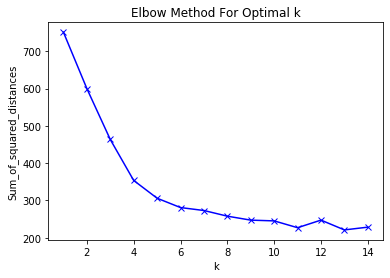

In [127]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Before starting clustering the districts i had to understand the best optimal number of clusers which I can use to get a better grouping of the objects by Kmeans method. The best for this purpose is to use elbow method and it was found as 5. So I can start grouping and labeling each of the venue with a specific cluster. After merging we have a result below:

In [127]:
joined_table.head(5)

,address_borough,lat,lng,address_street,type,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Zhetysu District,43.289880,76.926703,Ryskulov Ave 57/В,Продажа автомобилей,4,Торговый центр,Офис компании,Кафе,Строительный магазин,Интернет-магазин,Производитель металлоизделий,Поставщик окон,Продажа оборудования,Поставщик лабораторного оборудования,Дилер Subaru
3,Zhetysu District,43.284758,76.948181,"просп. Суюнбая 89,Алматы",Офис компании,4,Торговый центр,Офис компании,Кафе,Строительный магазин,Интернет-магазин,Производитель металлоизделий,Поставщик окон,Продажа оборудования,Поставщик лабораторного оборудования,Дилер Subaru
4,Zhetysu District,43.288218,76.940784,Seyfullin St 288,Офис компании,4,Торговый центр,Офис компании,Кафе,Строительный магазин,Интернет-магазин,Производитель металлоизделий,Поставщик окон,Продажа оборудования,Поставщик лабораторного оборудования,Дилер Subaru
7,Almaly District,43.249144,76.932853,Seyfullin St 563,Офис компании,3,Кафе,Bank,Торговый центр,Ресторан,Кофейня,Офис компании,Ресторан грузинской кухни,ATM,Производитель,Ресторан итальянской кухни
8,Almaly District,43.263537,76.945241,Nazarbayev Ave уг,Продажа оборудования,3,Кафе,Bank,Торговый центр,Ресторан,Кофейня,Офис компании,Ресторан грузинской кухни,ATM,Производитель,Ресторан итальянской кухни


<b> When we analyze above table we can label each cluster as follows<b>: 

Cluster 0 : “Naurizbayskiy district” - region with private houses, mostly local pastimes for families, cafes and shops 
    
Cluster 1 : “Auezov and Turksib districts" - mixed with private houses, car services stations, ATM's and medium size living neighboorhoods 
    
Cluster 2 : “Naurizbayskiy district” with venues closer to the city - private houses, a couple of Banks' Branches, more shops and trading centers 
    
Cluster 3 : "Almaty, Medeu, Bostandyk"- most developed districts in the city with multiple infastructure items 
    
Cluster 4 : "Alatau district" - district with mixed private houses, petrol stations, most car sales companies and producers are located in this part of city 
    

Clustering of different districts and grouping them can give us indication of similiarity or dissimiliarity of the city, but unfortunately it doesn't allow to indicate descriptive analitics of each district of the city. For this purpose I have gathered data in the table with the most important infustructure items such as trading centeres, big commercial and trading companies, producers, and other companies from absolutely different sectors of economy. Table is really good indicator for this purpose as we can compare different parts of the city and see how financial services are developed in the city. As well we can indicate population to Bank ratio which is a leading indicator in addition to clusters.

In [128]:
aggregated_table.head(10)

,address_borough,n_companies,populations,n_of_banks,pop_to_bank_ratio,n_of_molls,n_of_pastimes
0,Alatau District,16,260441.0,1.0,260441,21,7
1,Almaly District,54,215768.0,64.0,3371,42,139
2,Auezov District,24,295543.0,32.0,9235,34,20
3,Bostandyk District,37,343541.0,56.0,6134,35,56
4,Medeu District,25,209836.0,47.0,4464,27,87
5,Nauryzbayskiy District,3,128169.0,1.0,128169,2,2
6,Turksib District,13,235357.0,3.0,78452,10,8
7,Zhetysu District,35,166001.0,2.0,83000,36,6


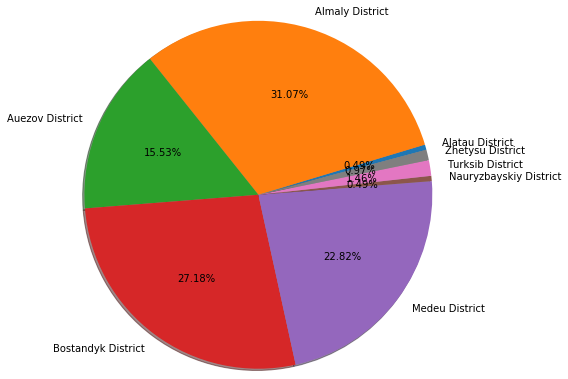

In [129]:
plt.pie(aggregated_table['n_of_banks'],  labels= aggregated_table['address_borough'],
        startangle=15,
        shadow = True,
       radius = 2, autopct = '%0.2f%%')
plt.show()

### <b> C.Result <b>

As you can see in the abovementioned pie chart and table there is a very great difference in the descriptive data of districts. The districts are very different, but lets see them on the map to have a better understanding.  

In [130]:
district_clusters

We obviously see a great area in the center of the city under cluster 3.  It means that according to administrative division of the city the districts Almaly, Medeu, Bostandyk  were grouped with Kmeans method as similiar and some areas of other districts have also been included in cluster 3. I have labelled all items included in cluster 3 with: 
1. Name of district
2. Relation to the cluster

#### Almost five hundred of venues are available in this cluster (3) of the city crossing by main roads, public transportation, with around 20 ATMs. But what district we can advise as the best to establish a Branch there?

### <b>D. Discussion<b>

As I mentioned before, Almaty is financial hub of Central Asia with medium sized population on rather large area. The population of each district vary from 100 thousands to more than 300 thousands, but the density of population of all 8 districts bring three leaders to the Top: Medeu, Bostandyk, Almaly districts. The main difficulty of Kmeans approach applied to this city is that the districts have rather great distances as compared to typical neighborhoods in big capitals like NY or LA. Using other types of segmentation like data on postal codes may devide Almaty on more clusters if we use a lower radius as well, but the difference between three leaders will be almost the same.

### F. Conclusion

Now I can give the answer to the Bank what is a better location to open a Branch. I recommend to open a Branch in Almaly district of the city as it has been clustered in same category as more expensive by rent Medeu district with Head Offices of International Banks. A greater infrastructure is a second merit as here there are 139 places for families entertainment, 42 trading centers, 54 businesses.  The location of the Branch in this district decrease uncertanity factor for Retail Business focus of the Bank.

<b>CODE PART<b>

Lets import required libraries to start this assignment.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographi

In [2]:
CLIENT_ID = 'CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV' # your Foursquare ID
CLIENT_SECRET = 'HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV
CLIENT_SECRET:HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM


In [3]:
address = '105 Dostyk Ave, Almaty'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.2259312 76.9610195


In [4]:
search_query = 'Bank'
radius = 10000
print(search_query + ' .... OK!')

Bank .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV&client_secret=HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM&ll=43.2259312,76.9610195&v=20180604&query=Bank&radius=10000&limit=30'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e91fa82e826ac001d41f8e7'},
 'response': {'venues': [{'id': '4f10173de4b038020129fdef',
    'name': 'Home Credit Bank / Хоум Кредит Банк',
    'location': {'address': 'БЦ «Сарканд»',
     'crossStreet': 'ул. Фурманова, 248',
     'lat': 43.224292061779366,
     'lng': 76.9538708499919,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.224292061779366,
       'lng': 76.9538708499919}],
     'distance': 607,
     'postalCode': '050020',
     'cc': 'KZ',
     'city': 'Алматы',
     'state': 'Алматы',
     'country': 'Қазақстан',
     'formattedAddress': ['050020',
      'Алматы',
      'Алматы',
      'БЦ «Сарканд» (ул. Фурманова, 248)',
      'Қазақстан']},
    'categories': [{'id': '4bf58dd8d48988d10a951735',
      'name': 'Bank',
      'pluralName': 'Banks',
      'shortName': 'Bank',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v

In [7]:
venues = results['response']['venues']

# tranform venues into a dataframe

dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4f10173de4b038020129fdef,БЦ «Сарканд»,KZ,Алматы,Қазақстан,"ул. Фурманова, 248",607,"[050020, Алматы, Алматы, БЦ «Сарканд» (ул. Фур...","[{'label': 'display', 'lat': 43.22429206177936...",43.224292,76.953871,050020,Алматы,Home Credit Bank / Хоум Кредит Банк,v-1586625322
1,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,55bf4d16498e8c0db4db947f,"мкр. Самал-2, 111.",KZ,Алматы,Қазақстан,NaN,804,"[Алматы, Алматы, мкр. Самал-2, 111., Қазақстан]","[{'label': 'display', 'lat': 43.23264426418892...",43.232644,76.957344,NaN,Алматы,Halyk Bank,v-1586625322
2,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,50934de77ab45785668cfdbb,105 Dostyk Ave.,KZ,Алматы,Қазақстан,Khadzhimukan Str.,14,"[050051, Алматы, Алматы, 105 Dostyk Ave. (Khad...","[{'label': 'display', 'lat': 43.22582233565949...",43.225822,76.960922,050051,Алматы,National Bank of Pakistan in Kazakhstan,v-1586625322
3,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4e6f1bfb62e1d475e20ac797,Аль-Фараби 36/В,KZ,Алматы,Қазақстан,Almaty Financial District,1427,"[050059, Алматы, Алматы, Аль-Фараби 36/В (Alma...","[{'label': 'display', 'lat': 43.22619975720432...",43.226200,76.943422,050059,Алматы,Al Hilal Bank Kazakhstan,v-1586625322
4,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4fbf4493e4b02ad5dba1bdfc,NaN,KZ,NaN,Қазақстан,NaN,2174,[Қазақстан],"[{'label': 'display', 'lat': 43.23798564304828...",43.237986,76.939924,NaN,NaN,Bank Centrcredit,v-1586625322


In [8]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Home Credit Bank / Хоум Кредит Банк,Bank,БЦ «Сарканд»,KZ,Алматы,Қазақстан,"ул. Фурманова, 248",607,"[050020, Алматы, Алматы, БЦ «Сарканд» (ул. Фур...","[{'label': 'display', 'lat': 43.22429206177936...",43.224292,76.953871,050020,Алматы,4f10173de4b038020129fdef
1,Halyk Bank,Bank,"мкр. Самал-2, 111.",KZ,Алматы,Қазақстан,NaN,804,"[Алматы, Алматы, мкр. Самал-2, 111., Қазақстан]","[{'label': 'display', 'lat': 43.23264426418892...",43.232644,76.957344,NaN,Алматы,55bf4d16498e8c0db4db947f
2,National Bank of Pakistan in Kazakhstan,Bank,105 Dostyk Ave.,KZ,Алматы,Қазақстан,Khadzhimukan Str.,14,"[050051, Алматы, Алматы, 105 Dostyk Ave. (Khad...","[{'label': 'display', 'lat': 43.22582233565949...",43.225822,76.960922,050051,Алматы,50934de77ab45785668cfdbb
3,Al Hilal Bank Kazakhstan,Bank,Аль-Фараби 36/В,KZ,Алматы,Қазақстан,Almaty Financial District,1427,"[050059, Алматы, Алматы, Аль-Фараби 36/В (Alma...","[{'label': 'display', 'lat': 43.22619975720432...",43.226200,76.943422,050059,Алматы,4e6f1bfb62e1d475e20ac797
4,Bank Centrcredit,Bank,NaN,KZ,NaN,Қазақстан,NaN,2174,[Қазақстан],"[{'label': 'display', 'lat': 43.23798564304828...",43.237986,76.939924,NaN,NaN,4fbf4493e4b02ad5dba1bdfc
5,"ГО Банк ""ЦентрКредит"" / HO Bank ""CenterCredit""",Bank,"просп. Аль-Фараби, 38",KZ,Алматы,Қазақстан,ул. Сейфулина,1449,"[050059, Алматы облысы, Алматы, просп. Аль-Фар...","[{'label': 'display', 'lat': 43.226361459677, ...",43.226361,76.943156,050059,Алматы облысы,4e8ef4688b814000385828a2
6,Bank ExpoCredit HQ,Office,NaN,KZ,NaN,Қазақстан,NaN,384,[Қазақстан],"[{'label': 'display', 'lat': 43.22531578136093...",43.225316,76.956359,NaN,NaN,4f3e3150e4b02744e4669929
7,KazKom Bank,Bank,"KIMEP, ул. Абая",KZ,Алматы,Қазақстан,ул. Валиханова,1938,"[Алматы, Алматы, KIMEP, ул. Абая (ул. Валихано...","[{'label': 'display', 'lat': 43.242573, 'lng':...",43.242573,76.953966,NaN,Алматы,4fbcafa6e4b08c2bc804d017
8,Halyk Bank HQ (Қазақстан Халық Банкі),Office,Аль-Фараби 40,KZ,Алматы,Қазақстан,Сейфуллина,1583,"[Алматы, Алматы, Аль-Фараби 40 (Сейфуллина), Қ...","[{'label': 'display', 'lat': 43.2260837102264,...",43.226084,76.941498,NaN,Алматы,5731a702498ed5592d1e935e
9,Bank RBK VIP,Bank,NaN,KZ,NaN,Қазақстан,NaN,2378,[Қазақстан],"[{'label': 'display', 'lat': 43.24471214012722...",43.244712,76.947047,NaN,NaN,52035eab498e69f17f9be018


In [9]:
dataframe_filtered.name

0                   Home Credit Bank / Хоум Кредит Банк
1                                            Halyk Bank
2               National Bank of Pakistan in Kazakhstan
3                              Al Hilal Bank Kazakhstan
4                                      Bank Centrcredit
5        ГО Банк "ЦентрКредит" / HO Bank "CenterCredit"
6                                    Bank ExpoCredit HQ
7                                           KazKom Bank
8                 Halyk Bank HQ (Қазақстан Халық Банкі)
9                                          Bank RBK VIP
10                                    Bank Centercredit
11                                           Kaspi Bank
12                             Группа Компаний Art-Bank
13                             Halyk Bank on Dostyk 109
14                              Capital Bank Kazakhstan
15                                           Halyk Bank
16                  Bank "PNB-Kazakhstan" (Punjab bank)
17                             Kaspi Bank (Head 

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Head Office',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### As we can see almost all of the Banks are concentrated in the financial center of the city. However, this information gives us only indirect impact for decision making and its really old-dated. As other sources mention another locations and more Banks and Branches located in this city. I have used payment sources to parse the data of all of the banks, branches.

In [11]:
pip install xlrd

     |████████████████████████████████| 103 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

In [13]:
df = pd.read_excel("parsed.xlsx") #uploading file from Outscraper

In [14]:
df.head()

,query,categories,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Citibank Kazakhstan,http://citibank.com/,Bank,Bank,"Kazybek Bi St 41, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/citi,NaN,NaN,NaN,NaN,NaN,"Online Banking, Mortgages, Personal Loans, Inv...","Open a bank account, apply for a personal loan...","banking, citi, financial services, checking ac..."
1,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Tengri Bank,http://www.tengribank.kz/,Bank,Bank,"Abay Ave 42, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/tr,https://www.instagram.com/tengribank,NaN,NaN,https://t.me/tengribankofficial,NaN,Главная | «Tengri Bank» JSC,NaN,NaN
2,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,KZI BANK (Kazakhstan Ziraat International Bank),http://www.kzibank.kz/,Bank,Bank,"Klochkov St. No:132 (Satbaeva-Auezova), Almaty...",Almaty,...,NaN,https://www.facebook.com/sharer,NaN,NaN,NaN,NaN,NaN,KZİ Bank,NaN,NaN
3,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/en/,Bank,Bank,Almaty 050000,Almaty,...,NaN,https://www.facebook.com/bcc,https://www.instagram.com/centercreditkz,NaN,NaN,NaN,NaN,Bank 'CenterCredit',NaN,NaN
4,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/,Bank,Bank,"Al-Farabi Avenue 38, Almaty 050059",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
alm_venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Head Office',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(alm_venues_map)

# add other Banks on the map
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(alm_venues_map)

# display map
alm_venues_map

### Now we see that actual information is different and since 2017 year some Banks opened additional branches, some of the have already changed their locations. Now its time to segment districts of the city. As we already have scarped data we don't require additional efforts, but we need to prepare our table for clustering.

In [16]:
df.head()

,query,categories,query_p2,query_p3,name,site,type,types,address,address_city,...,linkedin,facebook,instagram,google_plus,skype,telegram,site_generator,site_title,site_description,site_keywords
0,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Citibank Kazakhstan,http://citibank.com/,Bank,Bank,"Kazybek Bi St 41, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/citi,NaN,NaN,NaN,NaN,NaN,"Online Banking, Mortgages, Personal Loans, Inv...","Open a bank account, apply for a personal loan...","banking, citi, financial services, checking ac..."
1,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Tengri Bank,http://www.tengribank.kz/,Bank,Bank,"Abay Ave 42, Almaty 050000",Almaty,...,NaN,https://www.facebook.com/tr,https://www.instagram.com/tengribank,NaN,NaN,https://t.me/tengribankofficial,NaN,Главная | «Tengri Bank» JSC,NaN,NaN
2,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,KZI BANK (Kazakhstan Ziraat International Bank),http://www.kzibank.kz/,Bank,Bank,"Klochkov St. No:132 (Satbaeva-Auezova), Almaty...",Almaty,...,NaN,https://www.facebook.com/sharer,NaN,NaN,NaN,NaN,NaN,KZİ Bank,NaN,NaN
3,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/en/,Bank,Bank,Almaty 050000,Almaty,...,NaN,https://www.facebook.com/bcc,https://www.instagram.com/centercreditkz,NaN,NaN,NaN,NaN,Bank 'CenterCredit',NaN,NaN
4,"Banks, Almaty, Kazakhstan",Banks,Almaty,Kazakhstan,Center Credit Bank,https://www.bcc.kz/,Bank,Bank,"Al-Farabi Avenue 38, Almaty 050059",Almaty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns

Index(['query', 'categories', 'query_p2', 'query_p3', 'name', 'site', 'type',
       'types', 'address', 'address_city', 'address_borough', 'address_street',
       'postal_code', 'lat', 'lng', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'],
      dtype='object')

In [18]:
df = df.drop(['query','categories', 'query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [19]:
df.dropna()

,name,type,address_borough,lat,lng
0,Citibank Kazakhstan,Bank,Medeu District,43.257438,76.956957
1,Tengri Bank,Bank,Bostandyk District,43.240714,76.927797
2,KZI BANK (Kazakhstan Ziraat International Bank),Bank,Bostandyk District,43.235870,76.902687
3,Center Credit Bank,Bank,Medeu District,43.261060,76.960007
4,Center Credit Bank,Bank,Medeu District,43.226612,76.942683
5,National Bank of Pakistan,Bank,Medeu District,43.225966,76.961241
6,Capital Bank,Bank,Bostandyk District,43.240537,76.947502
7,MUFG Bank Almaty Representative Office,Bank,Medeu District,43.227407,76.944123
8,National Bank of Kazakhstan,Central bank,Bostandyk District,43.235131,76.917940
9,Eurasian Development Bank HQ,Bank,Medeu District,43.228007,76.961421


In [20]:
df_sorted_district = df.groupby('address_borough').count()

In [21]:
print('There are {} uniques categories.'.format(len(df['lat'].unique())))

There are 206 uniques categories.


#### We have found the number of branches in each region of Almaty (there are no neigborhoods actually, only districts). Now we have to understand which region will be more suitable for opening a new branch. First we will find the population of each region and will calculate population/branch ratio. Secondly, we will upload other information about other organizations in disctricts and cluster them. 

In [22]:
!conda install -c anaconda beautifulsoup4 --yes
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import urllib
import bs4 as bs
from bs4 import BeautifulSoup
import requests
print("All libraries are imported!")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.8.2       |           py37_0         161 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py37_0         159 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    soupsieve-2.0              |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be I

In [ ]:
url = requests.get("https://ru.wikipedia.org/wiki/Административно-территориальное_деление_Алма-Аты")
soup = bs.BeautifulSoup(url.content, 'html.parser')
print(soup.prettify())

In [ ]:
district_population_table = soup.find("table", {'class':'wikitable sortable'})
district_population_table

In [ ]:
tr_rows = district_population_table.find_all('tr')
tr_rows

In [ ]:
tr_rows = tr_rows[1:]

In [ ]:
tr_rows[0].text.split('\n')

In [ ]:
import pandas as pd

In [ ]:
columns_new_df = ['district','name','governor', 'sqkm', 'population', 'density','date_founded']

df_district = pd.DataFrame(columns = columns_new_df)

for row in tr_rows:
    row = row.text.split('\n')
    
    
    disctrict = row[1]
    
    name = row[2]
    
    governor = row[3]
    
    sqkm = row[4]
    
    population = row[5]
    
    density = row[6]
    
    date_founded = row[7]
           
    df_district = df_district.append({'district': disctrict,
                                      'name': name,
                                      'governor': governor,
                                      'sqkm': sqkm, 
                                      'population': population,
                                      'density': density,
                                      'date_founded': date_founded}, ignore_index = True)

df_district.head(10)

In [ ]:
df_district = df_district.drop(["name", 'governor', 'sqkm','density','date_founded'], 1)
df_district.head(10)

In [ ]:
df_district.iloc[[0], [0]] = 'Alatau District'
df_district.iloc[[1], [0]] = 'Almaly District'
df_district.iloc[[2], [0]] = 'Auezov District'
df_district.iloc[[3], [0]] = 'Bostandyk District'
df_district.iloc[[4], [0]] = 'Zhetysu District'
df_district.iloc[[5], [0]] = 'Medeu District'
df_district.iloc[[6], [0]] = 'Nauryzbayskiy District'
df_district.iloc[[7], [0]] = 'Turksib District'
df_district.head(10)

In [ ]:
df_district.set_axis(['address_borough', 'pop'], axis=1, inplace = True)

In [ ]:
df_sorted_district = df_sorted_district.reset_index()

In [ ]:
df_merged = pd.merge(df_district, df_sorted_district, on='address_borough', how='left', indicator=True)

In [ ]:
df_merged.head(10)

In [ ]:
df_merged = df_merged.drop(['type','lat','lng','_merge'], 1)
df_merged

In [ ]:
df_merged.iloc[[6],[2]] = '1'

In [ ]:
df_merged['name']= df_merged['name'].astype(float)

In [ ]:
df_merged['pop'] = df_merged['pop'].replace(r'\s+','',regex=True) # removing gaps from the cell to get clean figure

In [ ]:
df_merged['pop'] =df_merged['pop'].astype(float)

#### After simple manipulations we see that some of districts have only 1 or 2 branches, but other remaining part of Banks are located in four districts, now lets calculate the population/branches index and append same in the table.

In [ ]:
df_merged.head()

In [ ]:
#df_merged.sort(key=lambda row: row[3], reverse=True)

In [ ]:
df_merged['ratio'] = " "

In [ ]:
df_merged['ratio']

In [ ]:
df_merged.dtypes

In [ ]:
df_merged['ratio'] = df_merged['pop'] / df_merged['name']

In [ ]:
df_merged['ratio'] = df_merged['ratio'].astype(int)

In [ ]:
df_merged.head(10)

In [ ]:
df_merged = df_merged.sort_values(by='ratio', ascending=True)

In [ ]:
df_merged.set_axis(['address_borough', 'populations', 'n_of_banks', 'pop_to_bank_ratio'], axis=1, inplace = True)

In [ ]:
df_merged.head()

#### As we can observe the ratio of population/branches indicates lower values for the districts which are either in the center of city or surround the center. This can be explained by two factors 1) population density and 2) location of main offices, buildings, cafes, restaurants. Other 4 ratios describe private sector with houses and residential property. In our research we will further concentrate on first four districts as they are more suitable and it seems have a better infrastructure. For these purposes we have to add to our table number of organizations, cafes, universities in each district to provide our table to Management of the Bank, as a recommendation. We will use FOURTHSQARE to get the data about organizations in Almaty. If result will not be great I will use parsed coordinates to complete this assignment. As it is a real task which may be used in real work, data must be relevant and fresh.

In [ ]:
CLIENT_ID = 'CFU5RK1JLBW5GUZ1IRARNERG1QUORXDTNEWK1X42UUK22PMV' # your Foursquare ID
CLIENT_SECRET = 'HJQJG3DZDVHDGVGAF5OY23MIHB0012TV3VRLLJHGPJDFP5VM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
address = '105 Dostyk Ave, Almaty'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

In [ ]:
search_query = 'ТОО'
radius = 10000
print(search_query + ' .... OK!')

In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

In [ ]:
results = requests.get(url).json()
results

In [ ]:
venues = results['response']['venues']

# tranform venues into a dataframe

data_frame = json_normalize(venues)
data_frame.head()

In [ ]:
other_filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
other_dataframe_filtered = data_frame.loc[:, other_filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
other_dataframe_filtered['categories'] = other_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
other_dataframe_filtered.columns = [column.split('.')[-1] for column in other_dataframe_filtered.columns]

other_dataframe_filtered

In [ ]:
other_dataframe_filtered.name

In [ ]:
companies_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='company',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(companies_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(other_dataframe_filtered.lat, other_dataframe_filtered.lng, other_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(companies_map)

# display map
companies_map

We have recieved result which we cannot accept and we we have to use another informational sources to finilize this assignemt of real problem.

In [ ]:
df_llps = pd.read_excel('organizations.xlsx') #LLP - limited liablity parterships
df_pastimes = pd.read_excel('pastimes.xlsx') 
df_molls = pd.read_excel('trading centers.xlsx')

In [ ]:
df_llps.head()

In [ ]:
df_llps = df_llps.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [ ]:
df_llps['address_borough'].isnull().sum()

In [ ]:
df_llps.dropna() # we have to clean the data 

In [ ]:
df_llps_sorted = df_llps.groupby('address_borough').count()

df_llps_sorted = df_llps_sorted.reset_index()

df_llps_sorted.head(10) # our table with LLPs is ready for merge

 #### Now we know that is the quantity of organizations in each district of the city, later we will accumulate them in one table. Lets gather other PD's for this table: cafes, trading centers.

In [ ]:
df_llps_sorted = df_llps_sorted.drop(['lat','lng'], 1)

In [ ]:
df_llps_sorted.set_axis(['address_borough', 'n_companies'], axis=1, inplace = True)

In [ ]:
df_llps_sorted.head()

In [ ]:
df_pastimes.head()

In [ ]:
df_pastimes = df_pastimes.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street', 'name', 'lng',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [ ]:
df_pastimes.head()

In [ ]:
df_pastimes_sorted = df_pastimes.groupby('address_borough').count()

df_pastimes_sorted = df_pastimes_sorted.reset_index()

df_pastimes_sorted.set_axis(['address_borough', 'n_of_pastimes'], axis=1, inplace = True)

df_pastimes_sorted.head(10) # our table with LLPs is ready for merge

In [ ]:
df_molls = df_molls.drop(['query','query_p1','type','query_p2', 'query_p3', 'site',
       'types', 'address', 'address_city', 'address_street', 'name', 'lng',
       'postal_code', 'time_zone', 'phone', 'rating', 'reviews',
       'reviews_link', 'reviews_per_score', 'reviews_id', 'photos_count',
       'photo', 'working_hours', 'verified', 'owner_id', 'owner_link',
       'reserving_table_link', 'booking_appointment_link', 'google_id',
       'email', 'email2', 'twitter', 'linkedin', 'facebook', 'instagram',
       'google_plus', 'skype', 'telegram', 'site_generator', 'site_title',
       'site_description', 'site_keywords'], 1)

In [ ]:
df_molls = df_molls.groupby('address_borough').count()

In [ ]:
df_molls_sorted = df_molls.reset_index()

df_molls_sorted.set_axis(['address_borough', 'n_of_molls'], axis=1, inplace = True)

In [ ]:
df_molls_sorted.head(10)

## We currently have four PD's to merge in one to get a better picture.
#### df_molls_sorted -number of molls located in different districts
#### df_pastimes_sorted - number of cafes, resturants
#### df_llps_sorted - number of companies 
#### df_merge collected data about disctrict and banks inside

In [ ]:
llps_and_banks = pd.merge(df_llps_sorted, df_merged, on='address_borough', how='left', indicator=False)

In [ ]:
llps_and_banks.head()

In [ ]:
molls_and_pastimes = pd.merge(df_molls_sorted, df_pastimes_sorted, on='address_borough', how='left', indicator=False)
molls_and_pastimes.head()

In [ ]:
aggregated_table = pd.merge(llps_and_banks, molls_and_pastimes, on='address_borough', how='left', indicator=False)

In [ ]:
!conda install -c patrikhlobil pandas-bokeh --yes
import pandas_bokeh

In [ ]:
aggregated_table.head(10)

In [ ]:
fgrs_for_plot = aggregated_table.drop(['populations','pop_to_bank_ratio'],1)

In [ ]:
fgrs_for_plot 

In [ ]:
all(isinstance(column, str) for column in fgrs_for_plot.columns)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = fgrs_for_plot['address_borough']

y1 = fgrs_for_plot['n_companies']
y2= fgrs_for_plot['n_of_banks']
y3 = fgrs_for_plot['n_of_pastimes']
y4 =  fgrs_for_plot['n_of_molls']

fig, ax = plt.subplots()

#ax.bar(x, y1, width = 0.4)
#ax.bar(x, y2, width = 0.4)
#ax.bar(x, y3, width = 0.4)
#ax.bar(x, y4, width = 0.4)


ax.stackplot(x, [y1, y2, y3, y4])

ax.set_facecolor('seashell')

fig.set_figwidth(20)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')

plt.title('Venues of Almaty')
plt.ylabel('Number of venues')
plt.xlabel('District names')

plt.show()

In [ ]:
df_all = pd.read_excel('all.xlsx')

In [ ]:
df_all = df_all.dropna()

In [ ]:
df_all.head()

In [ ]:
df_all.groupby('address_borough').count()

In [ ]:
almaty_onehot = pd.get_dummies(df_all[['type']], prefix="", prefix_sep ="")

almaty_onehot['address_borough'] = df_all['address_borough']

#making neighborhood first column

changed_columns = [almaty_onehot.columns[-1]] + list(almaty_onehot.columns[:-1])
almaty_onehot = almaty_onehot[changed_columns]

almaty_onehot.head()

In [ ]:
almaty_onehot.shape

In [ ]:
almaty_grouped = almaty_onehot.groupby('address_borough').mean().reset_index()

In [ ]:
almaty_grouped.shape

In [ ]:
top_10_venues = 10

In [ ]:
for hood in almaty_grouped['address_borough']: 
    print("----"+hood+"----") 
    temp = almaty_grouped[almaty_grouped['address_borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq'] 
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_10_venues)) 
    print('\n')

In [ ]:
import matplotlib.cm as cm 
import matplotlib.colors as colors

In [ ]:
def return_most_common_venues(row, top_10_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top_10_venues]

In [ ]:
import numpy as np

top_10_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['address_borough'] 

for ind in np.arange(top_10_venues):
    try: 
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))
    
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['address_borough'] = almaty_grouped['address_borough']

for ind in np.arange(almaty_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(almaty_grouped.iloc[ind, :], top_10_venues) 
    
neighborhoods_venues_sorted.head(10)

In [ ]:
from sklearn.cluster import KMeans 
import numpy as np
# we will run 5 clusters 
kclusters = 5

In [ ]:
almaty_grouped_clusters = almaty_grouped.drop('address_borough', 1)

In [ ]:
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(almaty_grouped_clusters)
kmeans.labels_[0:40]

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

In [ ]:
neighborhoods_venues_sorted.head(15)

In [ ]:
joined_table = df_all.join(neighborhoods_venues_sorted.set_index('address_borough'), on='address_borough')
joined_table.head(50)

In [ ]:
district_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(joined_table['lat'], joined_table['lng'], joined_table['address_borough'],
joined_table['Cluster_Labels']):
    label = folium.Popup(str(poi)+' Cluster '+ str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label, 
        color=rainbow[cluster-1],
        fill=True, 
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(district_clusters)
    
district_clusters

In [ ]:
!conda install -c districtdatalabs yellowbrick --yes

In [ ]:
almaty_onehot_num = almaty_onehot.drop(['address_borough'], 1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
mms = MinMaxScaler()
mms.fit(almaty_onehot_num)
data_transformed = mms.transform(almaty_onehot_num)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
almaty_grouped.head()

### Charts

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [ ]:
plt.pie(aggregated_table['n_companies'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

In [ ]:
plt.pie(aggregated_table['n_of_banks'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

In [ ]:
plt.pie(aggregated_table['n_of_molls'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

In [ ]:
plt.pie(aggregated_table['n_of_pastimes'], labels= aggregated_table['address_borough'], radius = 2, autopct = '%0.2f%%')
plt.show

#### Our detailed analisys of all districts of Almaty city indicates that majority of Banks prefer open new branches in Almaly district due to higher concentration of companies, Trading Centers, cafes. The business opportunities of this district are much higher than others due to density of population, distances and well developed infrustructure.  

In [ ]:
venues_map

In [ ]:
aggregated_table

## Thank you for watching my assignment!!!!

### Please pay your attention that service of FOURSQUARE is not very popular in this part of the world that's why a I had to use other sources. Another problem is that there is no proper JSON file to indicate disctricts on map along with labels. However i tried to gather all possible data to define a better location for Bank's business.